In [2]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Define paths
processed_data_path = os.path.join('..', 'data', 'processed')

In [4]:
# Load clustered data
users_clustered = pd.read_csv(os.path.join(processed_data_path, 'users_clustered.csv'))
movies_clustered = pd.read_csv(os.path.join(processed_data_path, 'movies_clustered.csv'))
ratings = pd.read_csv(os.path.join(processed_data_path, 'ratings.csv'))

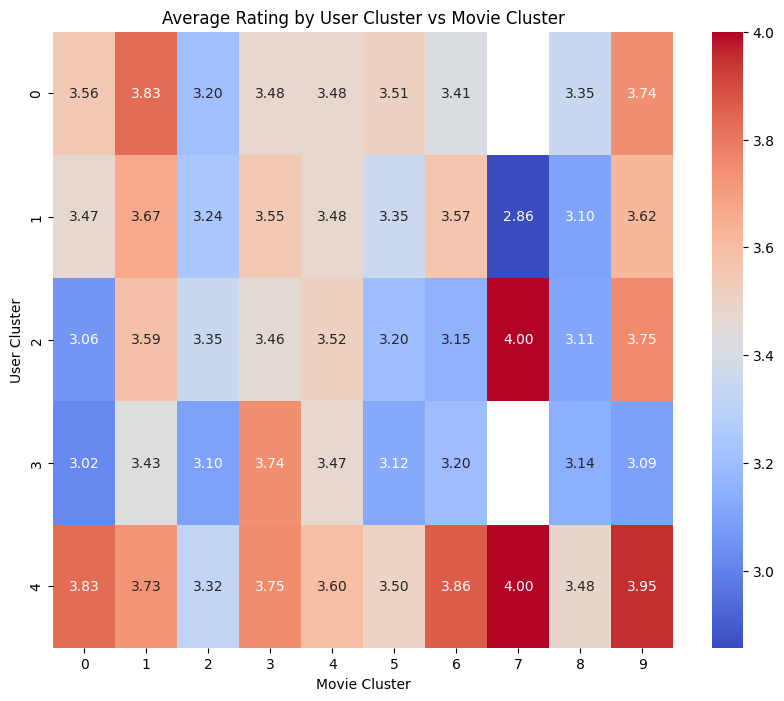

In [5]:

def plot_user_vs_movie_cluster_heatmap(users_clustered, movies_clustered, ratings):
    """
    Create a heatmap of average ratings per user cluster vs movie cluster.
    
    Parameters:
        users_clustered (DataFrame): DataFrame with 'user_id' and 'user_cluster'
        movies_clustered (DataFrame): DataFrame with 'movie_id' and 'movie_cluster'
        ratings (DataFrame): DataFrame with 'user_id', 'movie_id', and 'rating'
    """
    # Merge ratings with user clusters
    ratings_with_users = pd.merge(ratings, users_clustered[['user_id', 'user_cluster']], on='user_id', how='left')
    
    # Merge with movie clusters
    ratings_with_clusters = pd.merge(ratings_with_users, movies_clustered[['movie_id', 'movie_cluster']], on='movie_id', how='left')
    
    # Group by user_cluster and movie_cluster to get average rating
    cluster_rating_matrix = ratings_with_clusters.groupby(['user_cluster', 'movie_cluster'])['rating'].mean().reset_index()
    
    # Convert to pivot table for heatmap
    cluster_rating_pivot = cluster_rating_matrix.pivot(index='user_cluster', columns='movie_cluster', values='rating')
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cluster_rating_pivot, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Average Rating by User Cluster vs Movie Cluster')
    plt.xlabel('Movie Cluster')
    plt.ylabel('User Cluster')
    plt.show()

plot_user_vs_movie_cluster_heatmap(users_clustered, movies_clustered, ratings)

# User-Based Clustering Analysis
---

## View cluster distribution

C:\Users\villa\AppData\Local\Temp\ipykernel_13756\3916629214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=users_clustered, palette='Set2')


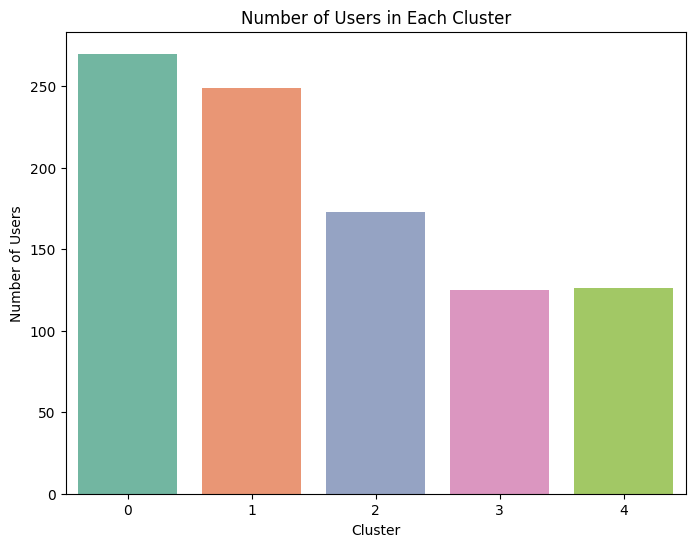

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=users_clustered, palette='Set2')
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

## Analyze average age per cluster

C:\Users\villa\AppData\Local\Temp\ipykernel_13756\845644655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='age', data=users_clustered, palette='Set3')


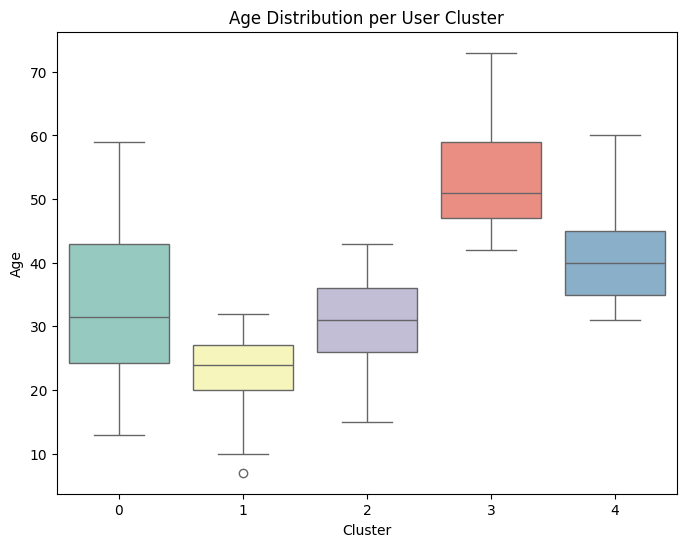

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='age', data=users_clustered, palette='Set3')
plt.title('Age Distribution per User Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

## Analyze gender distribution per cluster

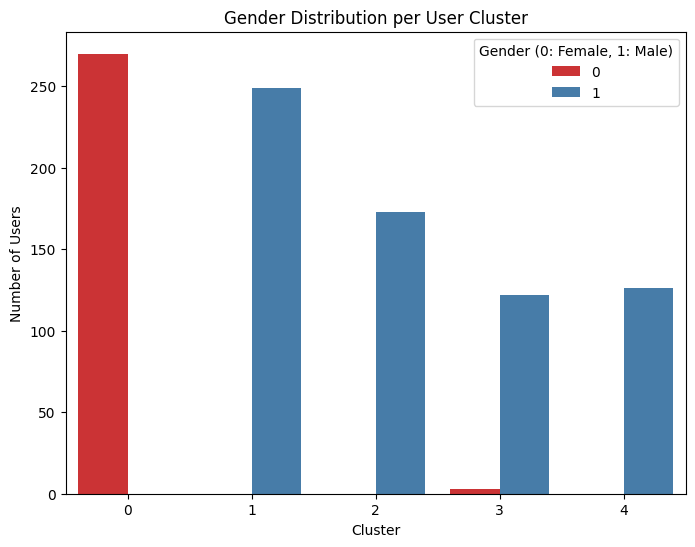

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='gender', data=users_clustered, palette='Set1')
plt.title('Gender Distribution per User Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.legend(title='Gender (0: Female, 1: Male)')
plt.show()

# Movie-Based Clustering Analysis
---

## View cluster distribution

C:\Users\villa\AppData\Local\Temp\ipykernel_13756\74889978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=movies_clustered, palette='Set1')


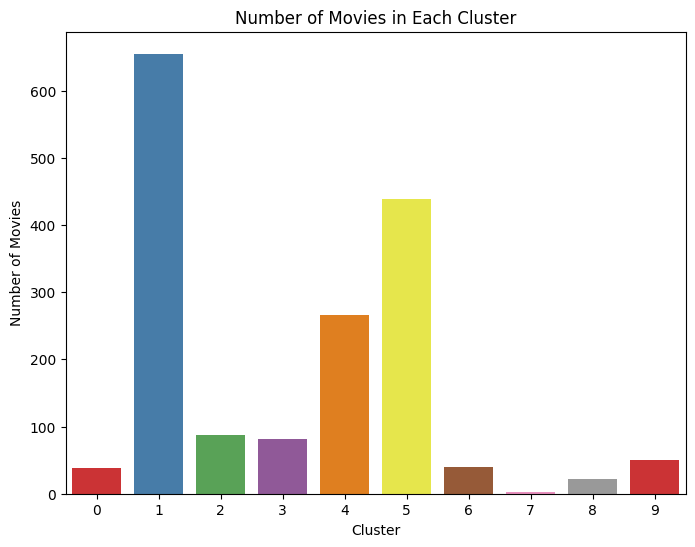

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=movies_clustered, palette='Set1')
plt.title('Number of Movies in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Movies')
plt.show()

## Analyze genre distribution per cluster

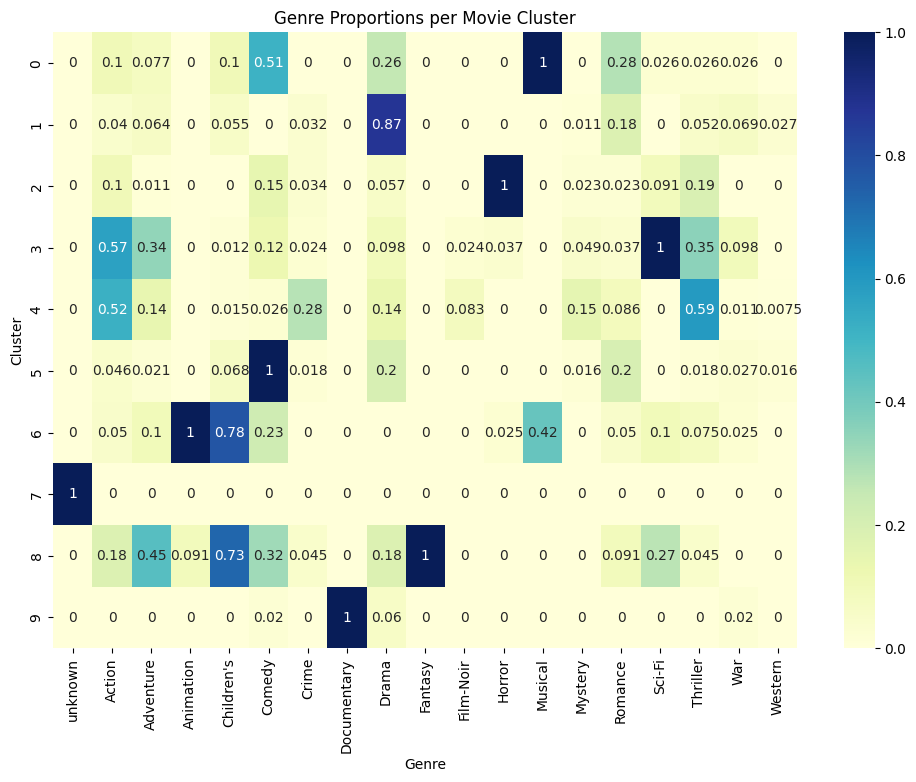

In [9]:
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate genre proportions per cluster
genre_proportions = movies_clustered.groupby('cluster')[genre_columns].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_proportions, annot=True, cmap='YlGnBu')
plt.title('Genre Proportions per Movie Cluster')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.show()